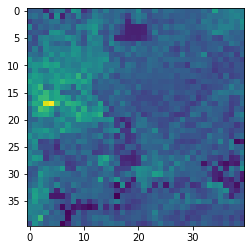

In [109]:
%matplotlib inline

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt


ds = xr.open_dataset("Murrumbidgee_near_Bundure__MUR_B3.nc")
ds = ds.nbart_blue.isel(time=[1,2,5,9,12,27], x=slice(400,800,10), y=slice(0,400,10))/1e4

plt.imshow(ds.isel(time=0).values)

(6, 1600)
(6, 1600, 1600)
(1600, 1600)
0.0013654788888888888 -0.0005022827777777778


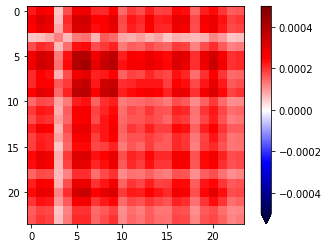

In [103]:
norm = ds.values.reshape(6,-1)-np.mean(ds.values.reshape(6,-1),axis=0)
print(norm.shape)

cov = np.einsum('ki,kj->kij',norm,norm)
print(cov.shape)
cov = np.mean(cov, axis=0)
print(cov.shape)

print(cov.max(), cov.min())

plt.imshow(cov[:24,:24],cmap='seismic',vmin=-0.0005,vmax=0.0005)
plt.colorbar(extend="min")

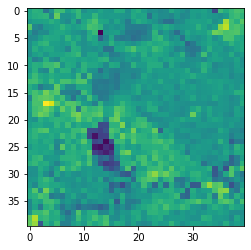

In [108]:
rec = ds.values[0,:,:].reshape(1,-1)@cov
plt.imshow(rec.reshape(40,40))

(6, 1600)
(1600, 1600)
0.0010293402777777781 -0.000915979166666667


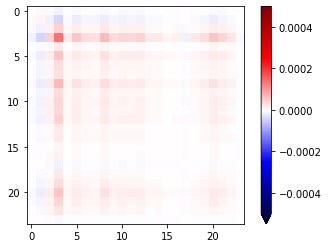

In [57]:
norm = ds.values.reshape(6,-1)-np.mean(ds.values.reshape(6,-1),axis=0)
print(norm.shape)

cov = norm[1:2,:].T@norm[1:2,:]
print(cov.shape)

print(cov.max(), cov.min())

plt.imshow(cov[:24,:24],cmap='seismic',vmin=-0.0005,vmax=0.0005)
plt.colorbar(extend="min")

(6, 1600)
(1600, 1600)
0.0014376736111111107 -0.0013928055555555562


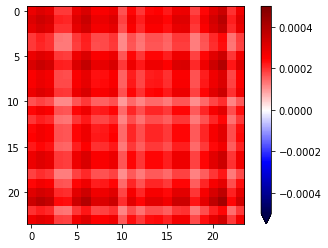

In [72]:
data = ds.values.reshape(6,-1)

norm = data-np.mean(data,axis=0)
print(norm.shape)

cov = norm[2:3,:].T@norm[2:3,:]
print(cov.shape)

print(cov.max(), cov.min())

plt.imshow(cov[:24,:24],cmap='seismic',vmin=-0.0005,vmax=0.0005)
plt.colorbar(extend="min")

(6, 1600)
(1600, 6, 6, 1600)
0.006566401111111111 -0.0034844333333333335


TypeError: Invalid shape (6, 6, 1600) for image data

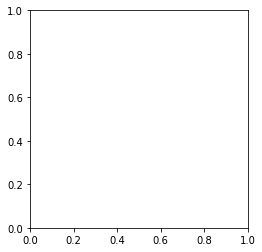

In [71]:
norm = ds.values.reshape(6,-1)-np.mean(ds.values.reshape(6,-1),axis=0)
print(norm.shape)

cov = np.tensordot(norm.T,norm,axes=0)
print(cov.shape)

print(cov.max(), cov.min())

plt.imshow(np.mean(cov[:,:24,:24], axis=0),cmap='seismic',vmin=-0.0005,vmax=0.0005)
plt.colorbar(extend="min")

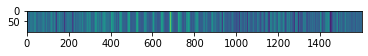

In [36]:
plt.imshow(np.tile(ds.values.reshape(6,-1)[2,:],(100,1)))

In [99]:
arr = np.array([[1,2,3],[4,5,6]])
arr = np.array([[1,2,3]])
#arr = np.array([[4,5,6]])

arr.T@arr

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [78]:
np.dot(arr.T,arr)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [82]:
np.matmul(arr.T,arr,axis=1)

TypeError: matmul: axis can only be used with a single shared core dimension, not with the 3 distinct ones implied by signature (n?,k),(k,m?)->(n?,m?).

In [97]:
np.einsum('ki,kj->kij',arr,arr)

array([[[ 1,  2,  3],
        [ 2,  4,  6],
        [ 3,  6,  9]],

       [[16, 20, 24],
        [20, 25, 30],
        [24, 30, 36]]])